In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
## link to Kaggle dataset: https://www.kaggle.com/datasets/julianbloise/winners-formula-1-1950-to-2025?resource=download

In [ ]:
## load and explore the data
f1_winners_data = pd.read_csv('winners_f1_1950_2025_v2.csv')

print('='*50)
print('Understand the data')
print('='*50)
print(' ')
print(f1_winners_data.head())
print('First 5 rows of the dataset:')
print('='*50)
print('Dataset info:')
print(f1_winners_data.info())
print('='*50)
print('Describe the dataset:')
print('='*50)
print(f1_winners_data.describe())
print('='*50)
print('Null values:')
print('='*50)
print(f1_winners_data.isnull().sum())
print('='*50)
print('Duplicated data: ', f1_winners_data.duplicated().sum())

Understand the data
 
         date      continent     grand_prix                       circuit  \
0  1950-05-13         Europe  Great Britain           Silverstone Circuit   
1  1950-05-21         Europe         Monaco             Circuit de Monaco   
2  1950-05-30  North America  United States   Indianapolis Motor Speedway   
3  1950-06-04         Europe    Switzerland            Circuit Bremgarten   
4  1950-06-18         Europe        Belgium  Circuit de Spa Francorchamps   

          winner_name                      team      time   laps  year  
0         Nino Farina                Alfa Romeo  02:13:23   70.0  1950  
1  Juan Manuel Fangio                Alfa Romeo  03:13:18  100.0  1950  
2     Johnnie Parsons  Kurtis Kraft Offenhauser  02:46:55  138.0  1950  
3         Nino Farina                Alfa Romeo  02:02:53   42.0  1950  
4  Juan Manuel Fangio                Alfa Romeo  02:47:26   35.0  1950  
First 5 rows of the dataset:
Dataset info:
<class 'pandas.core.frame.DataFram

In [41]:
## Create simplified team names
mapping = {
    'Alfa Romeo': 'Alfa Romeo',
    'Kurtis Kraft Offenhauser': 'Kurtis Kraft',
    'Ferrari': 'Ferrari',
    'Kuzma Offenhauser': 'Kuzma',
    'Maserati': 'Maserati',
    'Mercedes-Benz': 'Mercedes',
    'Watson Offenhauser': 'Watson',
    'Epperly Offenhauser': 'Epperly',
    'Vanwall': 'Vanwall',
    'Cooper Climax': 'Cooper',
    'BRM': 'BRM',
    'Lotus Climax': 'Lotus',
    'Porsche': 'Porsche',
    'Brabham Climax': 'Brabham',
    'Honda': 'Honda',
    'Brabham Repco': 'Brabham',
    'Lotus BRM': 'Lotus',
    'Cooper Maserati': 'Cooper',
    'Lotus Ford': 'Lotus',
    'Eagle Weslake': 'Eagle',
    'McLaren Ford': 'McLaren',
    'Matra Ford': 'Matra',
    'Brabham Ford': 'Brabham',
    'March Ford': 'March',
    'Tyrrell Ford': 'Tyrrell',
    'Hesketh Ford': 'Hesketh',
    'Penske Ford': 'Penske',
    'Wolf Ford': 'Wolf',
    'Ligier Matra': 'Ligier',
    'Shadow Ford': 'Shadow',
    'Brabham Alfa Romeo': 'Brabham',
    'Ligier Ford': 'Ligier',
    'Renault': 'Renault',
    'Williams Ford': 'Williams',
    'Brabham BMW': 'Brabham',
    'McLaren TAG': 'McLaren',
    'Williams Honda': 'Williams',
    'Lotus Renault': 'Lotus',
    'Benetton BMW': 'Benetton',
    'Lotus Honda': 'Lotus',
    'McLaren Honda': 'McLaren',
    'Williams Renault': 'Williams',
    'Benetton Ford': 'Benetton',
    'Benetton Renault': 'Benetton',
    'Ligier Mugen Honda': 'Ligier',
    'McLaren Mercedes': 'McLaren',
    'Jordan Mugen Honda': 'Jordan',
    'Stewart Ford': 'Stewart',
    'Williams BMW': 'Williams',
    'Jordan Ford': 'Jordan',
    'Sauber BMW': 'Sauber',
    'STR Ferrari': 'Toro Rosso',
    'Brawn Mercedes': 'Brawn GP',
    'RBR Renault': 'Red Bull',
    'Red Bull Racing Renault': 'Red Bull',
    'Mercedes': 'Mercedes',
    'Red Bull Racing TAG Heuer': 'Red Bull',
    'Red Bull Racing Honda': 'Red Bull',
    'AlphaTauri Honda': 'AlphaTauri',
    'Racing Point BWT Mercedes': 'Racing Point',
    'Alpine Renault': 'Alpine',
    'Red Bull Racing RBPT': 'Red Bull',
    'Red Bull Racing Honda RBPT': 'Red Bull',
    'McLaren': 'McLaren',
    'Red Bull Racing': 'Red Bull',
}

# Apply mapping to create simplified team column
f1_winners_data['team_simplified'] = f1_winners_data['team'].map(mapping)

# Check if there are any unmapped teams
unmapped = f1_winners_data[f1_winners_data['team_simplified'].isnull()]['team'].unique()
if len(unmapped) > 0:
    print("Warning: The following teams were not mapped:")
    print(unmapped)
else:
    print("All teams successfully mapped!")

print(f"\nSimplified team counts:")
print(f1_winners_data['team_simplified'].value_counts())


All teams successfully mapped!

Simplified team counts:
Ferrari         249
McLaren         200
Mercedes        130
Red Bull        124
Williams        114
Lotus            81
Renault          35
Brabham          35
Benetton         27
Tyrrell          23
BRM              17
Cooper           16
Alfa Romeo       11
Vanwall          10
Matra             9
Maserati          9
Ligier            9
Brawn GP          8
Kurtis Kraft      5
Jordan            4
Wolf              3
March             3
Honda             3
Watson            3
Epperly           2
Penske            1
Hesketh           1
Shadow            1
Eagle             1
Porsche           1
Stewart           1
Sauber            1
Toro Rosso        1
Kuzma             1
AlphaTauri        1
Racing Point      1
Alpine            1
Name: team_simplified, dtype: int64


In [46]:
## Define consistent color palette for top teams (used across all charts)
team_colors = {
    'Ferrari': '#DC0000',      # Ferrari Red
    'McLaren': '#FF8700',      # McLaren Orange
    'Mercedes': '#00D2BE',     # Mercedes Teal
    'Red Bull': '#0600EF',     # Red Bull Blue
    'Williams': '#005AFF',     # Williams Blue
    'Lotus': '#FFD700',        # Lotus Gold
    'Renault': '#FFF500',      # Renault Yellow
    'Brabham': '#1E3A8A',      # Dark Blue
    'Benetton': '#20C997',     # Benetton Green
    'Tyrrell': '#003366',      # Navy Blue
}


/var/folders/9l/fr8tlm8543d9jw3kp1ytdxs00000gn/T/ipykernel_41725/3096540069.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=team_wins.values, y=team_wins.index, palette=colors, ax=ax)


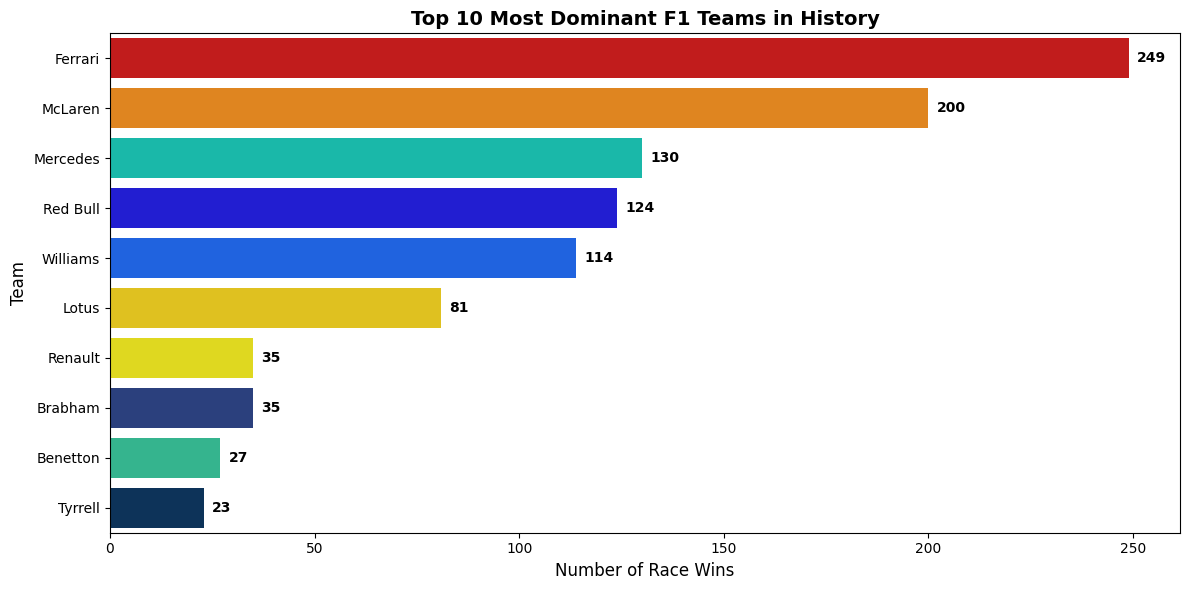


Top 10 Teams by Total Wins:
Ferrari     249
McLaren     200
Mercedes    130
Red Bull    124
Williams    114
Lotus        81
Renault      35
Brabham      35
Benetton     27
Tyrrell      23
Name: team_simplified, dtype: int64


In [49]:
## most dominant team in history

team_wins = f1_winners_data['team_simplified'].value_counts().head(10)

## plot bar chart
# Create color list for the bar chart based on the teams in order
colors = [team_colors.get(team, '#808080') for team in team_wins.index]

# Create a figure
fig, ax = plt.subplots(figsize=(12, 6))
bars = sns.barplot(x=team_wins.values, y=team_wins.index, palette=colors, ax=ax)

# Add data labels to each bar
for i, (value, name) in enumerate(zip(team_wins.values, team_wins.index)):
    ax.text(value + 2, i, f'{value}', va='center', fontsize=10, fontweight='bold')

ax.set_xlabel('Number of Race Wins', fontsize=12)
ax.set_ylabel('Team', fontsize=12)
ax.set_title('Top 10 Most Dominant F1 Teams in History', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nTop 10 Teams by Total Wins:")
print(team_wins)

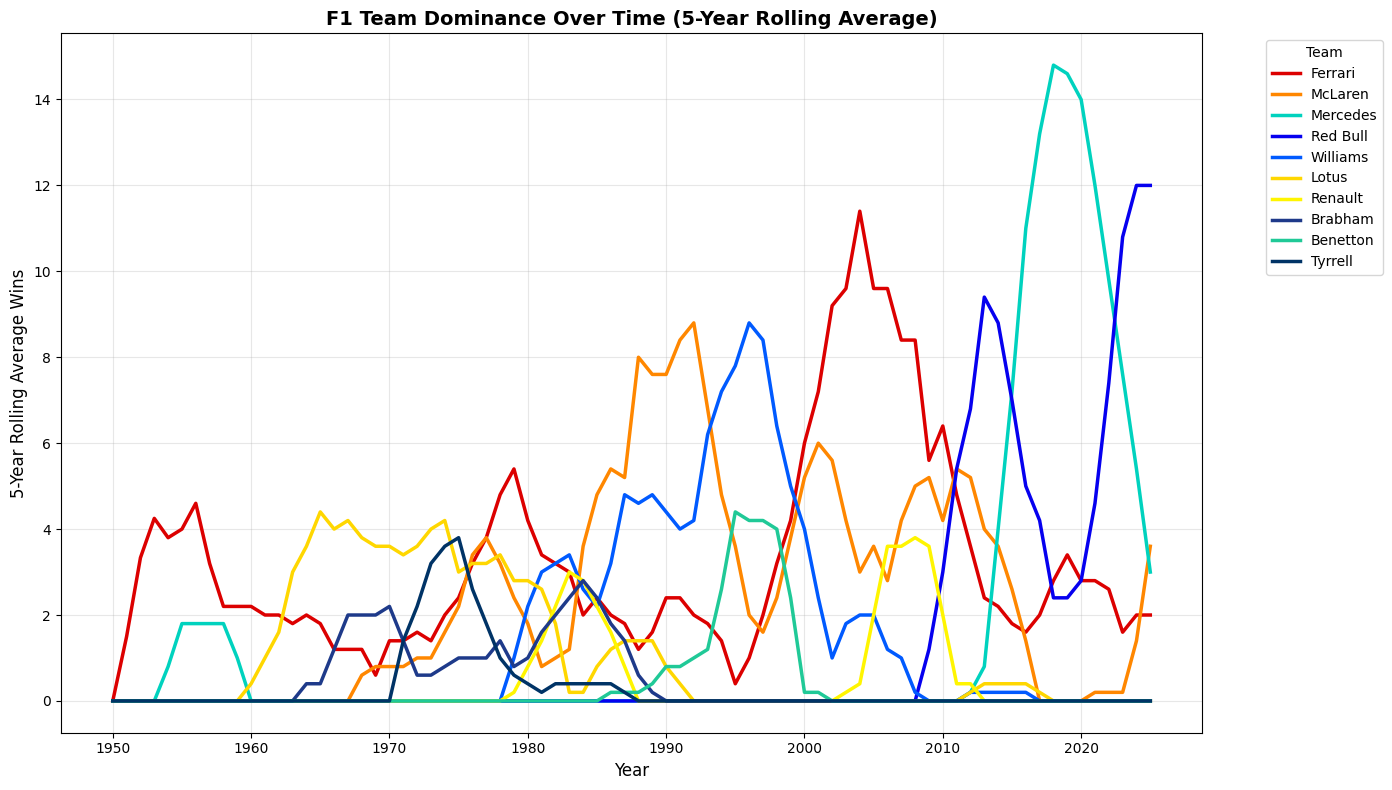

In [51]:
## most dominant team over time using 5 year rolling windows
# Count wins by team and year
team_year_wins = f1_winners_data.groupby(['year', 'team_simplified']).size().reset_index(name='wins')

# Get top 10 teams to track (same as bar chart)
top_teams = f1_winners_data['team_simplified'].value_counts().head(10).index.tolist()

# Calculate 5-year rolling average for each team
rolling_data = []
for team in top_teams:
    team_data = team_year_wins[team_year_wins['team_simplified'] == team].copy()
    # Create a complete year range
    all_years = pd.DataFrame({'year': range(f1_winners_data['year'].min(), 
                                            f1_winners_data['year'].max() + 1)})
    team_data = all_years.merge(team_data[['year', 'wins']], on='year', how='left')
    team_data['wins'] = team_data['wins'].fillna(0)
    team_data['team_simplified'] = team
    # Calculate 5-year rolling average
    team_data['rolling_avg'] = team_data['wins'].rolling(window=5, min_periods=1).mean()
    rolling_data.append(team_data)

rolling_df = pd.concat(rolling_data, ignore_index=True)

# Create color palette list for the line plot
palette = [team_colors.get(team, '#808080') for team in top_teams]

# Plot
fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(data=rolling_df, x='year', y='rolling_avg', hue='team_simplified', 
             palette=palette, linewidth=2.5, ax=ax)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('5-Year Rolling Average Wins', fontsize=12)
ax.set_title('F1 Team Dominance Over Time (5-Year Rolling Average)', fontsize=14, fontweight='bold')
ax.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()